In [106]:
# Import necessary libraries

import imp
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mlb
import matplotlib.pyplot as plt
import os
import io

# to display images

import PIL
from PIL import Image
import cv2

import tensorflow as tf
from tensorflow.image import rgb_to_grayscale
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import array_to_img

from pyspark import SparkContext
from pyspark.sql import SparkSession, Row
from pyspark.sql.functions import udf
from pyspark.sql.types import StructType,StructField, StringType, IntegerType, BinaryType
from pyspark.ml.linalg import Vectors, DenseVector, VectorUDT, Vectors 
from pyspark.ml.feature import StandardScaler, PCA, VectorAssembler
from pyspark.ml.image import ImageSchema
from pyspark.conf import SparkConf

import pyspark.sql.functions as F
from pyspark.sql.functions import *


#from keras.applications import inception_v3, xception, ResNet50
#from sparkdl import DeepImageFeaturizer

# setting
import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns=200
pd.options.display.max_rows=200

## scan the work / data directories and files 

In [42]:
os.getcwd()

'/home/houssein/Documents/openclassrooms/p8/deployez_un_modele_dans_le_cloud'

In [43]:
os.listdir()

['Franck_P8_Notebook_local.ipynb',
 'p8_pretreatment_reduction_2.ipynb',
 'venv',
 'Franck_P8_Notebook_ec2.ipynb',
 '.idea',
 '.ipynb_checkpoints',
 'p8_pretreatment_reduction.ipynb',
 'data',
 'p8_pretreatment_reduction_3.ipynb',
 'p8_pretreatment_reduction_1.ipynb']

In [44]:
os.listdir('data/')

['fruits-360-original-size', 'fruits-360']

In [45]:
os.listdir('data/fruits-360/')

['papers', 'LICENSE', 'readme.md', 'test-multiple_fruits', 'Test', 'Training']

In [46]:
os.listdir('data/fruits-360/Test/')

['Cucumber Ripe 2',
 'Hazelnut',
 'Tomato 3',
 'Mango',
 'Passion Fruit',
 'Mulberry',
 'Grape Blue',
 'Kiwi',
 'Walnut',
 'Pear Williams',
 'Mango Red',
 'Carambula',
 'Avocado',
 'Quince',
 'Apple Red 1',
 'Blueberry',
 'Apple Crimson Snow',
 'Apricot',
 'Tomato 4',
 'Pepper Red',
 'Apple Red Yellow 1',
 'Onion White',
 'Cherry Wax Black',
 'Tomato 1',
 'Maracuja',
 'Grape White 3',
 'Kumquats',
 'Tomato 2',
 'Rambutan',
 'Grape Pink',
 'Cherry 1',
 'Cherry 2',
 'Pear',
 'Physalis',
 'Mangostan',
 'Nut Pecan',
 'Tomato Maroon',
 'Fig',
 'Peach Flat',
 'Limes',
 'Apple Red Yellow 2',
 'Pear Forelle',
 'Tomato not Ripened',
 'Tamarillo',
 'Cucumber Ripe',
 'Granadilla',
 'Corn',
 'Mandarine',
 'Kohlrabi',
 'Apple Golden 2',
 'Cherry Wax Yellow',
 'Cantaloupe 2',
 'Apple Red 3',
 'Raspberry',
 'Plum 3',
 'Plum',
 'Pepper Green',
 'Banana',
 'Onion Red',
 'Apple Golden 3',
 'Potato Red Washed',
 'Tomato Cherry Red',
 'Physalis with Husk',
 'Cocos',
 'Banana Red',
 'Grapefruit Pink',
 'Ca

In [47]:
len(os.listdir('data/fruits-360/Test'))

131

In [48]:
categories = os.listdir('data/fruits-360/Test')
for i in range(len(categories)):
    categories[i] = categories[i].lower()
    cat = categories[i].split()
    categories[i] = '_'.join(c for c in cat)
    # print(categories[i])
d = {'categories': categories}
df = pd.DataFrame(data=d)
df = df.sort_values('categories')
df.reset_index().drop(columns='index')

,categories
0,apple_braeburn
1,apple_crimson_snow
2,apple_golden_1
3,apple_golden_2
4,apple_golden_3
5,apple_granny_smith
6,apple_pink_lady
7,apple_red_1
8,apple_red_2
9,apple_red_3


In [49]:
categories = os.listdir('data/fruits-360/Test')
for category in categories:
    category = category.lower()
    cat = category.split()
    category = '_'.join(c for c in cat)
    print(category)
d = {'categories': categories}
df = pd.DataFrame(data=d)
df

cucumber_ripe_2
hazelnut
tomato_3
mango
passion_fruit
mulberry
grape_blue
kiwi
walnut
pear_williams
mango_red
carambula
avocado
quince
apple_red_1
blueberry
apple_crimson_snow
apricot
tomato_4
pepper_red
apple_red_yellow_1
onion_white
cherry_wax_black
tomato_1
maracuja
grape_white_3
kumquats
tomato_2
rambutan
grape_pink
cherry_1
cherry_2
pear
physalis
mangostan
nut_pecan
tomato_maroon
fig
peach_flat
limes
apple_red_yellow_2
pear_forelle
tomato_not_ripened
tamarillo
cucumber_ripe
granadilla
corn
mandarine
kohlrabi
apple_golden_2
cherry_wax_yellow
cantaloupe_2
apple_red_3
raspberry
plum_3
plum
pepper_green
banana
onion_red
apple_golden_3
potato_red_washed
tomato_cherry_red
physalis_with_husk
cocos
banana_red
grapefruit_pink
cactus_fruit
avocado_ripe
pepino
pomelo_sweetie
banana_lady_finger
nut_forest
strawberry_wedge
pear_2
clementine
cantaloupe_1
tangelo
grape_white
cherry_wax_red
apple_braeburn
pomegranate
chestnut
onion_red_peeled
salak
pear_kaiser
beetroot
cherry_rainier
apple_pink_l

,categories
0,Cucumber Ripe 2
1,Hazelnut
2,Tomato 3
3,Mango
4,Passion Fruit
5,Mulberry
6,Grape Blue
7,Kiwi
8,Walnut
9,Pear Williams


In [50]:
len(os.listdir('data/fruits-360/Training/'))

131

In [51]:
len(os.listdir('data/fruits-360/Test/Potato White/'))

150

## spark code for reading jpg files, extract features & excute a pca

In [52]:
# spark session creation 
#spark = SparkSession.builder.master("local[16]").appName("Fruits").getOrCreate()
#conf=SparkConf()


spark = SparkSession.builder \
      .master("local[16]") \
      .appName("Fruits") \
      .config("spark.executor.memory", "8g") \
      .config("spark.driver.memory", "8g") \
      .getOrCreate()

spark.sparkContext.setLogLevel("OFF")

sc = SparkContext.getOrCreate()

spark

In [53]:
os.walk('data/fruits-360/Test/')

<generator object _walk at 0x7f626c2031b0>

In [54]:
# for roots,dirs,files in os.walk('data/fruits-360/Test/'):
#     for file in files:
#         print(roots,file)

In [55]:
columns = ["path", "category", "filename", "image"]
l1 = []
for roots,dirs,files in os.walk('data/fruits-360/Test/'):
    for file in files:
        filename = os.path.join(roots,file)
        l = (roots, roots[21:], filename, file)
        l1.append(l)
    
rdd = spark.sparkContext.parallelize(l1)
df = rdd.toDF(columns)
df.show()

+--------------------+---------------+--------------------+-------------+
|                path|       category|            filename|        image|
+--------------------+---------------+--------------------+-------------+
|data/fruits-360/T...|Cucumber Ripe 2|data/fruits-360/T...|  196_100.jpg|
|data/fruits-360/T...|Cucumber Ripe 2|data/fruits-360/T...|  218_100.jpg|
|data/fruits-360/T...|Cucumber Ripe 2|data/fruits-360/T...|  198_100.jpg|
|data/fruits-360/T...|Cucumber Ripe 2|data/fruits-360/T...|  169_100.jpg|
|data/fruits-360/T...|Cucumber Ripe 2|data/fruits-360/T...|r_164_100.jpg|
|data/fruits-360/T...|Cucumber Ripe 2|data/fruits-360/T...|r_186_100.jpg|
|data/fruits-360/T...|Cucumber Ripe 2|data/fruits-360/T...|  128_100.jpg|
|data/fruits-360/T...|Cucumber Ripe 2|data/fruits-360/T...|  204_100.jpg|
|data/fruits-360/T...|Cucumber Ripe 2|data/fruits-360/T...|r_157_100.jpg|
|data/fruits-360/T...|Cucumber Ripe 2|data/fruits-360/T...|  125_100.jpg|
|data/fruits-360/T...|Cucumber Ripe 2|

In [56]:
print((df.count(), len(df.columns)))

(22688, 4)


In [57]:
df.select("filename").show(2, truncate=False)

+------------------------------------------------+
|filename                                        |
+------------------------------------------------+
|data/fruits-360/Test/Cucumber Ripe 2/196_100.jpg|
|data/fruits-360/Test/Cucumber Ripe 2/218_100.jpg|
+------------------------------------------------+
only showing top 2 rows



## read images with tensorflow methodes

In [58]:
img_0_0 = df.select("filename").collect()[0][0]
print(img_0_0)

data/fruits-360/Test/Cucumber Ripe 2/196_100.jpg


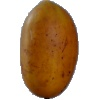

In [59]:
load_img(img_0_0)

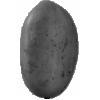

In [60]:
array_to_img(rgb_to_grayscale(img_to_array(load_img(img_0_0))))

In [61]:
img_to_array(array_to_img(rgb_to_grayscale(img_to_array(load_img(img_0_0)))))

array([[[255.],
        [255.],
        [255.],
        ...,
        [255.],
        [255.],
        [255.]],

       [[255.],
        [255.],
        [255.],
        ...,
        [255.],
        [255.],
        [255.]],

       [[255.],
        [255.],
        [255.],
        ...,
        [255.],
        [255.],
        [255.]],

       ...,

       [[255.],
        [255.],
        [255.],
        ...,
        [255.],
        [255.],
        [255.]],

       [[255.],
        [255.],
        [255.],
        ...,
        [255.],
        [255.],
        [255.]],

       [[255.],
        [255.],
        [255.],
        ...,
        [255.],
        [255.],
        [255.]]], dtype=float32)

In [112]:
# Select distinct rows (unique_values)
distinctDF = df.select("path").distinct()

print(distinctDF.count())

distinctDF = distinctDF.withColumn('path_all', concat(col('path'), lit("/*") ))

distinctDF.show(truncate=False)

distinctDF.collect()[0][0]


131
+---------------------------------------+-----------------------------------------+
|path                                   |path_all                                 |
+---------------------------------------+-----------------------------------------+
|data/fruits-360/Test/Mulberry          |data/fruits-360/Test/Mulberry/*          |
|data/fruits-360/Test/Mango             |data/fruits-360/Test/Mango/*             |
|data/fruits-360/Test/Passion Fruit     |data/fruits-360/Test/Passion Fruit/*     |
|data/fruits-360/Test/Cucumber Ripe 2   |data/fruits-360/Test/Cucumber Ripe 2/*   |
|data/fruits-360/Test/Hazelnut          |data/fruits-360/Test/Hazelnut/*          |
|data/fruits-360/Test/Tomato 3          |data/fruits-360/Test/Tomato 3/*          |
|data/fruits-360/Test/Kiwi              |data/fruits-360/Test/Kiwi/*              |
|data/fruits-360/Test/Pear Williams     |data/fruits-360/Test/Pear Williams/*     |
|data/fruits-360/Test/Grape Blue        |data/fruits-360/Test/Grape Blue

'data/fruits-360/Test/Mulberry'

In [63]:
distinctDF.show(1, truncate=False)

+-----------------------------+
|path                         |
+-----------------------------+
|data/fruits-360/Test/Mulberry|
+-----------------------------+
only showing top 1 row



In [115]:
distinctDF.select('path_all').collect()[0][0]

'data/fruits-360/Test/Mulberry/*'

In [120]:
#initiation phase first row (row = 0)
path_initiation = distinctDF.select('path_all').collect()[0][0]
img_all = spark.read.format("binaryfile").load(path_initiation)
#loop for to collect all photos
for row in range(1, distinctDF.count()):
    path_i = distinctDF.select('path_all').collect()[row][0]
    img_i = spark.read.format("binaryfile").load(path_i)
    img_all = img_all.union(img_i)

img_all.printSchema()

root
 |-- path: string (nullable = true)
 |-- modificationTime: timestamp (nullable = true)
 |-- length: long (nullable = true)
 |-- content: binary (nullable = true)



In [121]:
print((img_all.count(), len(img_all.columns)))

(22688, 4)


In [122]:
img_df = img_all.select("path", "content")
n_rows = img_df.count()
img_df = img_df.withColumn("target", split(col("path"), "/") \
    .getItem(10))
img_df.show()

+--------------------+--------------------+--------+
|                path|             content|  target|
+--------------------+--------------------+--------+
|file:/home/housse...|[FF D8 FF E0 00 1...|Mulberry|
|file:/home/housse...|[FF D8 FF E0 00 1...|Mulberry|
|file:/home/housse...|[FF D8 FF E0 00 1...|Mulberry|
|file:/home/housse...|[FF D8 FF E0 00 1...|Mulberry|
|file:/home/housse...|[FF D8 FF E0 00 1...|Mulberry|
|file:/home/housse...|[FF D8 FF E0 00 1...|Mulberry|
|file:/home/housse...|[FF D8 FF E0 00 1...|Mulberry|
|file:/home/housse...|[FF D8 FF E0 00 1...|Mulberry|
|file:/home/housse...|[FF D8 FF E0 00 1...|Mulberry|
|file:/home/housse...|[FF D8 FF E0 00 1...|Mulberry|
|file:/home/housse...|[FF D8 FF E0 00 1...|Mulberry|
|file:/home/housse...|[FF D8 FF E0 00 1...|Mulberry|
|file:/home/housse...|[FF D8 FF E0 00 1...|Mulberry|
|file:/home/housse...|[FF D8 FF E0 00 1...|Mulberry|
|file:/home/housse...|[FF D8 FF E0 00 1...|Mulberry|
|file:/home/housse...|[FF D8 FF E0 00 1...|Mul

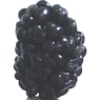

In [132]:
# Take first image of dataset
img_example = img_df.collect()[0]["content"]
# Convert from bytes to jpeg using tensorflow
img_example = load_img(io.BytesIO(img_example))
img_example

In [124]:
#initiation phase first row (row = 0)
path_initiation = distinctDF.select('path_all').collect()[0][0]
img_all_1 = spark.read.format("image").load(path_initiation)
#loop for to collect all photos
for row in range(1, distinctDF.count()):
    path_i = distinctDF.select('path_all').collect()[row][0]
    img_i_1 = spark.read.format("image").load(path_i)
    img_all_1 = img_all_1.union(img_i_1)

img_all_1.printSchema()

root
 |-- image: struct (nullable = true)
 |    |-- origin: string (nullable = true)
 |    |-- height: integer (nullable = true)
 |    |-- width: integer (nullable = true)
 |    |-- nChannels: integer (nullable = true)
 |    |-- mode: integer (nullable = true)
 |    |-- data: binary (nullable = true)



In [125]:
print((img_all_1.count(), len(img_all_1.columns)))

(22688, 1)


In [126]:
img_df_1 = img_all_1.select("image.origin", 'image.nChannels', "image.width", "image.height","image.mode", 
   "image.data")
img_df_1.show()

+--------------------+---------+-----+------+----+--------------------+
|              origin|nChannels|width|height|mode|                data|
+--------------------+---------+-----+------+----+--------------------+
|file:/home/housse...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:/home/housse...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:/home/housse...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:/home/housse...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:/home/housse...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:/home/housse...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:/home/housse...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:/home/housse...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:/home/housse...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:/home/housse...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:/home/housse...|        3|  100|   100|  16|[FF FF FF FF F

In [129]:
# Take first image of dataset
img_example_1 = img_df_1.collect()[0]["data"]
# Convert from bytes to jpeg
img_example_1 = load_img(img_example_1)
img_example_1

Py4JJavaError: An error occurred while calling o2805.collectToPython.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 31 in stage 1313.0 failed 1 times, most recent failure: Lost task 31.0 in stage 1313.0 (TID 59710) (hou executor driver): java.io.FileNotFoundException: 
File file:/home/houssein/Documents/openclassrooms/p8/deployez_un_modele_dans_le_cloud/data/fruits-360/Test/Passion%20Fruit/r_325_100.jpg does not exist

It is possible the underlying files have been updated. You can explicitly invalidate
the cache in Spark by running 'REFRESH TABLE tableName' command in SQL or by
recreating the Dataset/DataFrame involved.
       
	at org.apache.spark.sql.errors.QueryExecutionErrors$.readCurrentFileNotFoundError(QueryExecutionErrors.scala:648)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.org$apache$spark$sql$execution$datasources$FileScanRDD$$anon$$readCurrentFile(FileScanRDD.scala:212)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.nextIterator(FileScanRDD.scala:270)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.hasNext(FileScanRDD.scala:116)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage3.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:760)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:364)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:890)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:890)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:136)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:548)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1504)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:551)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:829)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2672)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2608)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2607)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2607)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1182)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1182)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1182)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2860)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2802)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2791)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:952)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2228)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2249)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2268)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2293)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1021)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:406)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1020)
	at org.apache.spark.sql.execution.SparkPlan.executeCollect(SparkPlan.scala:424)
	at org.apache.spark.sql.Dataset.$anonfun$collectToPython$1(Dataset.scala:3688)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:3858)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:510)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:3856)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:109)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:169)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:95)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:779)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3856)
	at org.apache.spark.sql.Dataset.collectToPython(Dataset.scala:3685)
	at jdk.internal.reflect.GeneratedMethodAccessor135.invoke(Unknown Source)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: java.io.FileNotFoundException: 
File file:/home/houssein/Documents/openclassrooms/p8/deployez_un_modele_dans_le_cloud/data/fruits-360/Test/Passion%20Fruit/r_325_100.jpg does not exist

It is possible the underlying files have been updated. You can explicitly invalidate
the cache in Spark by running 'REFRESH TABLE tableName' command in SQL or by
recreating the Dataset/DataFrame involved.
       
	at org.apache.spark.sql.errors.QueryExecutionErrors$.readCurrentFileNotFoundError(QueryExecutionErrors.scala:648)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.org$apache$spark$sql$execution$datasources$FileScanRDD$$anon$$readCurrentFile(FileScanRDD.scala:212)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.nextIterator(FileScanRDD.scala:270)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.hasNext(FileScanRDD.scala:116)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage3.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:760)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:364)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:890)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:890)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:365)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:329)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:136)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:548)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1504)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:551)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	... 1 more


In [65]:
# Create an empty RDD
emp_RDD = spark.sparkContext.emptyRDD()
 
# # Create empty schema
# cols = StructType([])

#Create Schema

cols = StructType([
  StructField('image', StructType([
      StructField('origin', StringType(), True),
      StructField('height', IntegerType(), True),
      StructField('width', IntegerType(), True),
      StructField('nChannels', IntegerType(), True),
      StructField('mode', IntegerType(), True),
      StructField('data', BinaryType(), True)
  ]))]) 


# Create an empty RDD with empty schema
df_photos = spark.createDataFrame(data = emp_RDD, schema = cols)
  

for i in range(1):
   df_photo = spark.read.format("image").load(distinctDF.collect()[i][0])
   df_photos = df_photos.union(df_photo)


df_photos.select("image.origin", 'image.nChannels', "image.width", "image.height","image.mode", 
   "image.data").show()

+--------------------+---------+-----+------+----+--------------------+
|              origin|nChannels|width|height|mode|                data|
+--------------------+---------+-----+------+----+--------------------+
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF F

In [66]:
df_photos.count()

164

In [67]:
df_photos.select("image.origin").show(1, truncate=False)

+----------------------------------------------------------------------------------------------------------------------------+
|origin                                                                                                                      |
+----------------------------------------------------------------------------------------------------------------------------+
|file:///home/houssein/Documents/openclassrooms/p8/deployez_un_modele_dans_le_cloud/data/fruits-360/Test/Mulberry/191_100.jpg|
+----------------------------------------------------------------------------------------------------------------------------+
only showing top 1 row



In [68]:
df_photos_preprocess = df_photos.select("image.origin", 'image.nChannels', "image.width", "image.height","image.mode", 
   "image.data")
df_photos_preprocess.show()

+--------------------+---------+-----+------+----+--------------------+
|              origin|nChannels|width|height|mode|                data|
+--------------------+---------+-----+------+----+--------------------+
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF F

In [89]:
df_photos_preprocess.collect()[0]['origin'][7:]

'/home/houssein/Documents/openclassrooms/p8/deployez_un_modele_dans_le_cloud/data/fruits-360/Test/Mulberry/191_100.jpg'

In [29]:
# Les données images sont converties au format vecteur dense
ud_f = udf(lambda x: Vectors.dense(x), VectorUDT())
df_photos_preprocess = df_photos_preprocess.withColumn('vecs', ud_f('data'))
df_photos_preprocess.show()

+--------------------+---------+-----+------+----+--------------------+--------------------+
|              origin|nChannels|width|height|mode|                data|                vecs|
+--------------------+---------+-----+------+----+--------------------+--------------------+
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|[255.0,255.0,255....|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|[255.0,255.0,255....|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|[255.0,255.0,255....|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|[255.0,255.0,255....|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|[255.0,255.0,255....|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|[255.0,255.0,255....|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|[255.0,255.0,255....|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...

In [31]:
df_photos_preprocess.select('vecs').show(1, truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [30]:
load_img(df_photos_preprocess.select('vecs').collect()[0][0])

TypeError: path should be path-like or io.BytesIO, not <class 'pyspark.ml.linalg.DenseVector'>

In [ ]:
scaler = StandardScaler(inputCol='vecs', outputCol='scaled_vecs', withStd=True, withMean=True)

# Compute summary statistics by fitting the StandardScaler
scalerModel = scaler.fit(df_photos_preprocess)
df_photos_preprocess = scalerModel.transform(df_photos_preprocess)
df_photos_preprocess.show()

+--------------------+---------+-----+------+----+--------------------+--------------------+--------------------+
|              origin|nChannels|width|height|mode|                data|                vecs|         scaled_vecs|
+--------------------+---------+-----+------+----+--------------------+--------------------+--------------------+
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|[255.0,255.0,255....|[0.0,0.0,0.0,0.0,...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|[255.0,255.0,255....|[0.0,0.0,0.0,0.0,...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|[255.0,255.0,255....|[0.0,0.0,0.0,0.0,...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|[255.0,255.0,255....|[0.0,0.0,0.0,0.0,...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|[255.0,255.0,255....|[0.0,0.0,0.0,0.0,...|
|file:///home/hous...|        3|  100|   100|  16|[FF FF FF FF FF F...|[255.0,255.0,255.

In [ ]:
len(df_photos_preprocess.select('scaled_vecs').collect()[0][0])

30000

In [ ]:
pca = PCA(k=3, inputCol="scaled_vecs", outputCol="PCA_vecs")
pca_model = pca.fit(df_photos_preprocess)

result = pca_model.transform(df_photos_preprocess).select("PCA_vecs")

result.show()

----------------------------------------                          (0 + 15) / 15]
Exception occurred during processing of request from ('127.0.0.1', 49894)
ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/home/houssein/Documents/openclassrooms/p8/deployez_un_modele_dans_le_cloud/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_177223/1908730531.py", line 2, in <module>
    pca_model = pca.fit(df_photos_preprocess)
  File "/home/houssein/Documents/openclassrooms/p8/deployez_un_modele_dans_le_cloud/venv/lib/python3.10/site-packages/pyspark/ml/base.py", line 205, in fit
    return self._fit(dataset)
  File "/home/houssein/Documents/openclassrooms/p8/deployez_un_modele_dans_le_cloud/venv/lib/python3.10/site-packages/pyspark/ml/wrapper.py", line 379, in _fit
    java_model = self._fit_java(dataset)
  File "/home/houssein/Documents/open

ConnectionRefusedError: [Errno 111] Connection refused